![hierarchical_clustering](./img/hierarchical_clustering.png)

![linkage](./img/linkage.png) 
![linkage ward](./img/linkage-ward.png) 

## Ventajas
+ No necesito el número de clusters.
+ Simple
+ Resultados interpretables.
+ Unica ejecución.
+ Ayuda visual del dendograma.

## Desvantajas
+ Tarda en datasets largo.
+ No tiene un objetivo matemático.
+ Le afectan outliers drásticamente.
+ Mayor necesidad de cómputo.

## ¿Cuándo usarlo?
+ Comprender resultados visualmente.
+ Dataset es pequeño o mediano.
+ Desconozco el número de clusters.
+ Resultados rápidos.

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Preparando los datos

In [3]:
X,y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

## Visualizando datos

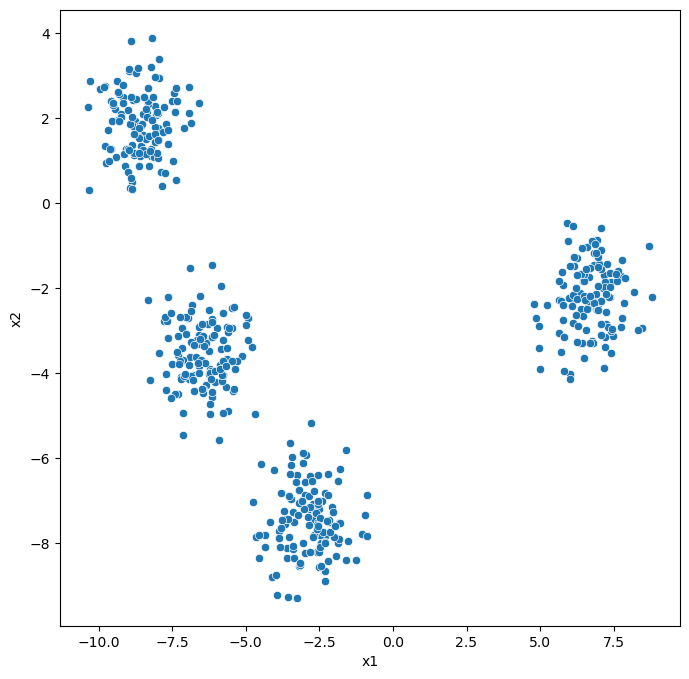

In [4]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2')
plt.show()

## Dendrograma y hierarchical clustering

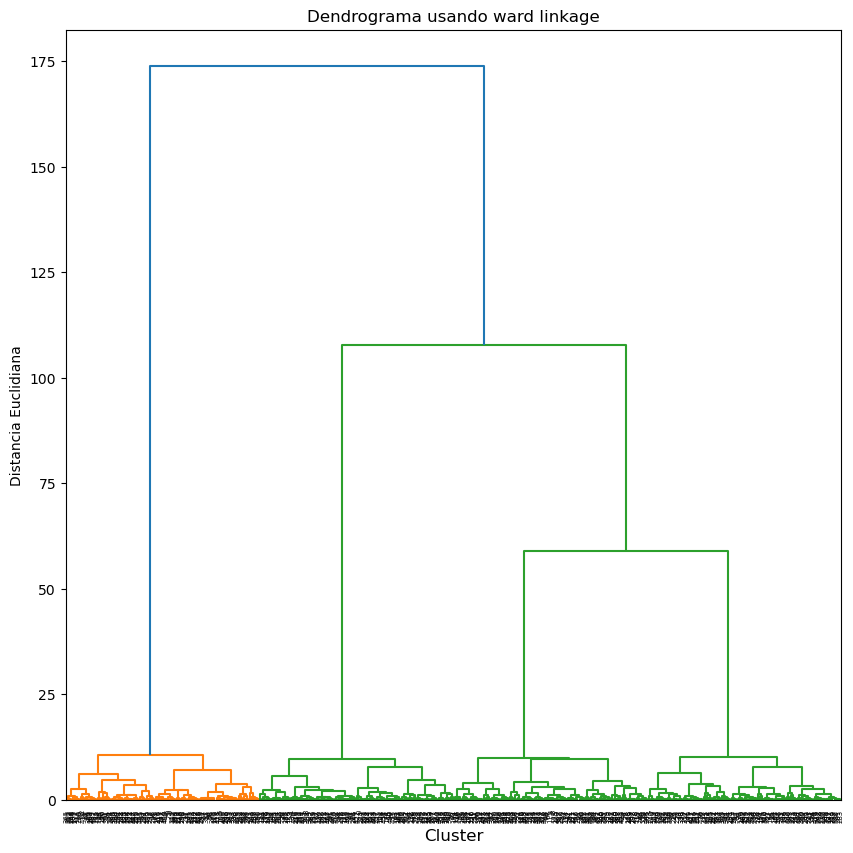

In [5]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

In [7]:
# crear el modelo  y entrenarlo
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [8]:
# incluir la predicción del modelo en el dataframe
df_blobs['cluster'] = y_hc

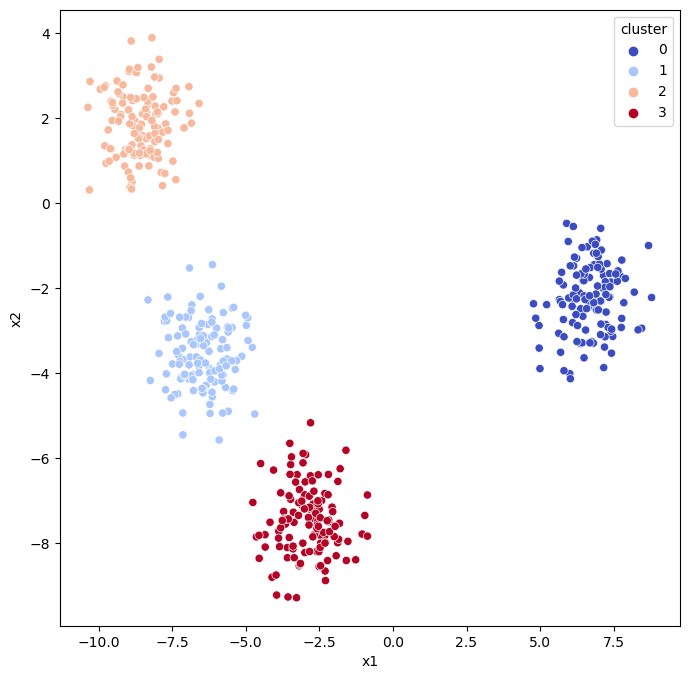

In [9]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2', hue='cluster', palette='coolwarm')
plt.show()